In [13]:
#https://www.linkedin.com/pulse/text-classification-using-bag-words-approach-nltk-scikit-rajendran/
#https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.utils import shuffle
import sklearn

In [14]:
dev = pd.read_csv('development.csv')
print(len(dev))

28754


In [47]:
from numpy.random import rand
counter = 0
for i,r in dev.iterrows():
    n = rand()
    if r[1] == 'pos' and counter<10000 and n < 0.5:
        dev = dev.drop(i,axis=0)
        counter = counter + 1
print(len(dev))

18968


In [166]:
eva = pd.read_csv('evaluation.csv')

In [12]:
posWords = pd.read_csv('ListPositiveWord.csv',skiprows=1)
negWords = pd.read_csv('ListNegativeWord.csv',skiprows=1)

In [187]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.snowball import ItalianStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords as sw
import spacy

stop_words = sw.words('italian')#+['hotel','stanza','ristorante','guardare','cosa','persone','acqua','cibo','soggiornato','terrazza','visita','quali','trova','taxi','piscina','quando','opzione','vario','servizio','pranzo','vedute','utilizzato','viene','settimana','presto','pasta','stesso','venezia','torino','ross','milano','turistico','selezione','venezia','staff','mattino','presto','iniziare','me','senso','zona','tipo','spazi','varia','valigie','vini','vado','etc','stanchi','cereali','pernottato','zone','vedi']
frequent = ['hotel','albergo','camera','zoomarine','zona','prima','volta','principale']+\
['colazione','pranzo','cena','brioche','ristorante','cibo'+'yogurt','frutta','cereali','zucchero','caffe','acqua']+\
['venezia',',milano','roma','ischia','vacanza','viaggio','visita','vista','camera','stato','paese','citta','italia','collina','montagna','strada','giardino','piscina','spiaggia','mare','giugno','luglio','agosto','settembre','terrazza']+\
['stata','volere','volto','entare','vedere','vivere','volare','visualizzare','docciare','bagnare','soggiornare','affacciare','mangiare','macchinare','parlare','avere','tornire','ristorare','portare','versare','seguire','terrazzare','raggiungere','cimare','cercare','visitare','trovare','gestire','fissare']+\
['windows','week','weekend','western','suite','wellness','wagner','westin','york','wonderbox','reception','autobus']+\
['roberta','mario','luigi','quali']
unfrequent = ['abbandonata','abbandonato','abbandono','abbassare','abbastanza','abbazia', 'abbigliamento', 'abbondante', 'abbondante', 'abbondanti', 'abbondantissima', 'abbondanza', 'abbraccio', 'abiti', 'abituale', 'abituati', 'abituato', 'abitudine', 'abruzzo', 'acari', 'accade', 'accademia', 'accadere', 'accaduto', 'accanto','accappatoi', 'accappatoio', 'accattivante', 'accede', 'accedere', 'accende', 'accendere', 'accesa', 'acceso', 'accessibile', 'accessibili', 'accesso', 'accessori','accessoriate', 'accetta', 'accettabile', 'accettabili', 'accettano', 'accettare', 'accettato', 'accoglie', 'accogliente', 'accoglienti','accoglienza','accogliere','accolgono','accolta','accolti','accolto','accomodante','accomodare','accompagna','accompagnamento','accompagnano','accompagnata','accompagnati','accompagnato','accontentare','accontentati','accontentato','accordi','accordo','accorgo','accortezza','accorti','accorto','accostati','accurata','accuratamente','accurate','accurato','acqua']
include_words = ['no','non','mai','ben','bel','caro']



stop_words=stop_words+frequent+unfrequent
stop_words = set(stop_words)
include_words = set(include_words)

lemmatizer = spacy.load("it_core_news_sm", disable=["tokenizer","tagger", "parser", "ner", "textcat"])
def CleanSentence(sentence,sw=stop_words):
    sentence = sentence.lower()
    #Remove Special characters
    sentence = re.sub("`!@#$%^&*()_+-\{}|;'':,./<>?", "", sentence)
    #Remove digits
    sentence = re.sub("(\\d|\\W)+", " ", sentence)
    
    #stemmer=SnowballStemmer("italian")
    #sentence = stemmer.stem(sentence)
    
    lemmas = lemmatizer(sentence)
    newSentence = ""
    removed_s = []
    removed_c = []
    min = 4
    max = 18
    c = 0
    for lemma in lemmas:
        word = lemma.lemma_
        if word not in stop_words:
            if  (min < len(word) < max or word in include_words):
                newSentence = newSentence + word + " "
            #else:
                #removed_c.append(word)
        #else:
            #removed_s.append(word)
    #        c = c +1
    #print(c)
    if(False):
        #print(removed_s)
        if(len(removed_c)>0):
            print()
            print(removed_c)
            print("--- ---- ----")
    #print(newSentence)
    return newSentence

def CleanText(text):
    sentences = []
    for row in text:
        sentences.append(CleanSentence(row))
    
    return sentences

In [188]:
dev['clean'] = CleanText(dev['text'])

In [26]:
#Try to balance the classes: Normal: 2/3 pos, 1/3 neg
for i,r in dev.iterrows():
    if r[1] == 'neg':
        dev = dev.append(r)

37976

In [ ]:
posWords['clean'] = CleanSentence(posWords.iloc[0,0])
negWords['clean'] = CleanSentence(negWords.iloc[0,0])

In [ ]:
dev = dev.append(posWords)
dev = dev.append(negWords)
dev = dev.reset_index(drop=True)

In [192]:
eva['clean'] = CleanText(eva['text'])

In [73]:
#NO
counter_text = []
words_text = {}
for s in dev['text']:
    counter_text.append(len(s.split()))
    for w in s.split():
        if w not in words_text:
            words_text[w] = 1
        words_text[w] = words_text[w] + 1

In [74]:
#NO
counter_text_eva = []
words_text_eva = {}
for s in eva['text']:
    counter_text_eva.append(len(s.split()))
    for w in s.split():
        if w not in words_text_eva:
            words_text_eva[w] = 1
        words_text_eva[w] = words_text_eva[w] + 1

In [75]:
#NO
counter_clean = []
words_clean = {}
for index, row in dev.iterrows():
    counter_clean.append(len(row[2].split()))
    for w in row[2].split():
        if w not in words_clean:
            words_clean[w] = 1
        words_clean[w] = words_clean[w] + 1

In [76]:
#NO
counter_clean_eva = []
words_clean_eva = {}
for index, row in eva.iterrows():
    counter_clean_eva.append(len(row[1].split()))
    for w in row[1].split():
        if w not in words_clean_eva:
            words_clean_eva[w] = 1
        words_clean_eva[w] = words_clean_eva[w] + 1

In [77]:
print(f'{len(words_text)} {len(words_clean)}')

153276 49557


In [78]:
print(f'{len(words_text_eva)} {len(words_clean_eva)}')

89558 33262


means: 113.55035821103151 113.11855879250183
stds: 100.67431714434085 100.60579541968868


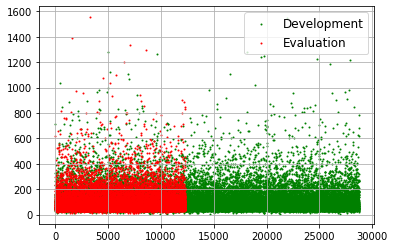

In [78]:
#NO
fig, ax = plt.subplots()
ax.scatter(range(0,len(counter_text)),counter_text,s=1,c='green',label='Development')
ax.scatter(range(0,len(counter_text_eva)),counter_text_eva,s=1,c='red',label='Evaluation')
print(f'means: {np.mean(counter_text)} {np.mean(counter_text_eva)}')
print(f'stds: {np.std(counter_text)} {np.std(counter_text_eva)}')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

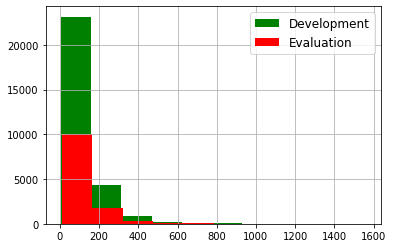

In [67]:
#NO
fig, ax = plt.subplots()
plt.hist(counter_text,label='Development',color='green')
plt.hist(counter_text_eva,label='Evaluation',color='red')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

means: 56.54797553774779 53.56609591820174
stds: 47.98939563193015 44.70404986761067


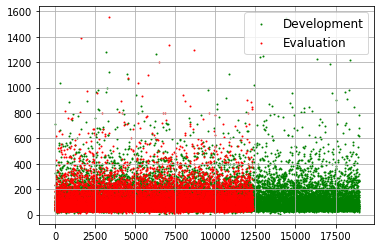

In [67]:
#NO
fig, ax = plt.subplots()
ax.scatter(range(0,len(counter_clean)),counter_text,s=1,c='green',label='Development')
ax.scatter(range(0,len(counter_clean_eva)),counter_text_eva,s=1,c='red',label='Evaluation')
print(f'means: {np.mean(counter_clean)} {np.mean(counter_clean_eva)}')
print(f'stds: {np.std(counter_clean)} {np.std(counter_clean_eva)}')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

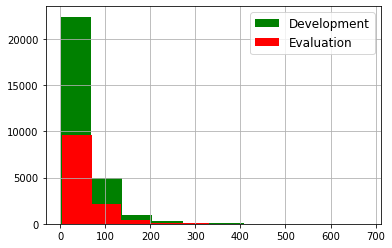

In [79]:
#NO
fig, ax = plt.subplots()
plt.hist(counter_clean,label='Development',color='green')
plt.hist(counter_clean_eva,label='Evaluation',color='red')

ax.legend(loc="upper right",fontsize=12)
ax.grid(True)

plt.show()

In [50]:
#NO
p = {'pos':0,'neg':0}
for i,r in dev.iterrows():
    if r[1] == 'pos':
        p['pos']  = p['pos'] + 1
    else:
        p['neg']  = p['neg'] + 1
print(f"Positive {p['pos']} Negative {p['neg']}")

Positive 9746 Negative 9222


<BarContainer object of 2 artists>

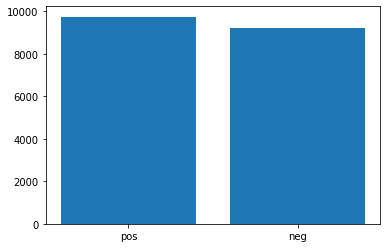

In [51]:
plt.bar(p.keys(), p.values())

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.feature_extraction .text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams

max_feature = len(dev['clean'])
print(f'#Feature {max_feature}')

def X_tfidf(sentences,max_feature = max_feature):  
    tfidf = TfidfVectorizer(min_df=20, max_df=0.81, ngram_range=(1,2),lowercase=False)
    X = tfidf.fit_transform(sentences)
    return X, tfidf
#Feature 28754

#Feature 28754


In [189]:



from sklearn.model_selection import train_test_split
if(False):
    dev = pd.read_csv('development.csv')
    dev['clean'] = CleanText(dev['text'])
X, vectorizer = X_tfidf(dev.iloc[:,2])

X_train, X_test, y_train, y_test = train_test_split(X,dev.iloc[:,1],test_size=0.1,random_state=0)




In [193]:
Y = vectorizer.transform(eva.iloc[:,1])

In [ ]:
#NO
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold 
X_train, X_test, y_train, y_test = train_test_split(X,dev.iloc[:,1],test_size=0.20,random_state=0,shuffle=False)

kf = RepeatedKFold(n_splits=50, n_repeats=5, random_state=0) 
#kf = KFold(n_splits=10, random_state=0) 
labels = dev.iloc[:,1]

sgd1 = SGDClassifier()

#X_ins = X_train
#y_ins = y_train

X_ins = X
y_ins = dev.iloc[:,1]
score = []
for train_index, test_index in kf.split(X_ins):
    X_tr, X_te = X_ins[train_index], X_ins[test_index] 
    y_tr, y_te = y_ins[train_index], y_ins[test_index]
    sgd1.fit(X_tr,y_tr)
    y_p = sgd1.predict(X_te)
    score.append(f1_score(y_te, y_p, average='weighted'))
#train_model(sgd, X_train, X_test, y_train, y_test)
np.mean(score)

In [ ]:
#NO
y_pr = sgd1.predict(X_test)
print(f"#f1 Score: {f1_score(y_test, y_pr, average='weighted')}")
y_eval = sgd1.predict(Y)

In [139]:


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
def train_model(classifier, X_train, X_test, y_train, y_test, printAll=False, printSomething=True):
    # fit the training dataset on the classifier
    classifier.fit(X_train, y_train)
    
    # predict the labels on validation dataset
    y_pred = classifier.predict(X_test)
    
    if(printSomething):
        print(f"#Accurancy: {accuracy_score(y_test, y_pred):.5f}")
        print(f"#f1 Score: {f1_score(y_test, y_pred, average='weighted'):.5f}")
        
    if(printAll):
        print(confusion_matrix(y_test,y_pred))      
        print(classification_report(y_test,y_pred))
    print("#--- --- ---")
    

In [190]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

# Naive Bayes on Word Level TF IDF Vectors
mNB = MultinomialNB()
train_model(mNB, X_train.todense(), X_test.todense(), y_train, y_test)
bNB = BernoulliNB()
train_model(bNB, X_train.todense(), X_test.todense(), y_train, y_test)
gNB = GaussianNB()
train_model(gNB, X_train.todense(), X_test.todense(), y_train, y_test)
#Accurancy: 0.95410
#f1 Score: 0.95371
#--- --- ---
#Accurancy: 0.93533
#f1 Score: 0.93501
#--- --- ---
#Accurancy: 0.90821
#f1 Score: 0.90888
#--- --- ---

#Accurancy: 0.95410
#f1 Score: 0.95375
#--- --- ---
#Accurancy: 0.92768
#f1 Score: 0.92724
#--- --- ---
#Accurancy: 0.89951
#f1 Score: 0.90063
#--- --- ---


In [ ]:
y_eval = mNB.predict(Y)

In [191]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

for i in range(10,110,10):
    print(i/100)
    lsvc = LinearSVC(tol=1e-8,max_iter=100000,random_state=0,C=i/100, penalty='l2')
    train_model(lsvc, X_train, X_test, y_train, y_test)

svc = SVC(random_state=0,kernel='linear')
#train_model(svc, X_train, X_test, y_train, y_test)

0.1
#Accurancy: 0.96558
#f1 Score: 0.96540
#--- --- ---
0.2
#Accurancy: 0.96592
#f1 Score: 0.96577
#--- --- ---
0.3
#Accurancy: 0.96766
#f1 Score: 0.96755
#--- --- ---
0.4
#Accurancy: 0.96801
#f1 Score: 0.96791
#--- --- ---
0.5
#Accurancy: 0.96662
#f1 Score: 0.96653
#--- --- ---
0.6
#Accurancy: 0.96627
#f1 Score: 0.96618
#--- --- ---
0.7
#Accurancy: 0.96627
#f1 Score: 0.96619
#--- --- ---
0.8
#Accurancy: 0.96592
#f1 Score: 0.96583
#--- --- ---
0.9
#Accurancy: 0.96627
#f1 Score: 0.96619
#--- --- ---
1.0
#Accurancy: 0.96523
#f1 Score: 0.96516
#--- --- ---


In [194]:
lsvc = LinearSVC(tol=1e-8,max_iter=10000,random_state=0,C=40/100, penalty='l2')
train_model(lsvc, X_train, X_test, y_train, y_test)
y_eval = lsvc.predict(Y)

#Accurancy: 0.96801
#f1 Score: 0.96791
#--- --- ---


In [54]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',max_iter=1000,random_state=0)
train_model(lr, X_train, X_test, y_train, y_test)
#Accurancy: 0.9548
#f1 Score: 0.9543
#--- --- ---

#Accurancy: 0.95549
#f1 Score: 0.95508
#--- --- ---


In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=520, random_state=0)
train_model(classifier, X_train, X_test, y_train, y_test)
#Accurancy: 0.9286
#f1 Score: 0.9272
#--- --- ---

#Accurancy: 0.92455
#f1 Score: 0.92291
#--- --- ---


In [ ]:
y_eval = classifier.predict(Y)

In [195]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(validation_fraction=0.1)
train_model(sgd, X_train, X_test, y_train, y_test,printAll=True)
#Accurancy: 0.9633750579508576
#f1 Score: 0.9632102921397484
#Accurancy: 0.9629
#f1 Score: 0.9627
#--- --- ---

#Accurancy: 0.96419
#f1 Score: 0.96400
[[ 893   71]
 [  32 1880]]
              precision    recall  f1-score   support

         neg       0.97      0.93      0.95       964
         pos       0.96      0.98      0.97      1912

    accuracy                           0.96      2876
   macro avg       0.96      0.95      0.96      2876
weighted avg       0.96      0.96      0.96      2876

#--- --- ---


In [64]:
y_eval = sgd.predict(Y)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

score = []
for i in range(2,100,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    sco = f1_score(y_test, y_pred, average='weighted')
    score.append(sco)
    print(f'{i} {sco:.4f}')

In [171]:
def WriteOnFile(name):
    f = open(name,"w")
    f.write("Id,Predicted\n")
    for index,i in enumerate(y_eval):
        f.write(f"{index},{i}\n")
    f.close

In [196]:
WriteOnFile("out22.csv")

In [92]:
for i in range(0,40):
    if y_eval[i] != 'pos':
        print(f"{i} {y_eval[i]}")

1 neg
3 neg
5 neg
7 neg
10 neg
11 neg
12 neg
13 neg
14 neg
16 neg
17 neg
20 neg
21 neg
23 neg
26 neg
28 neg
34 neg
35 neg


In [197]:
frequent_word = []
for i in sorted(vectorizer.vocabulary_.items(), key = lambda kv:(kv[1])):
    frequent_word.append(i)

In [198]:
frequent_word[-50:-1] 

[('vistare vistare', 11306),
 ('visuale', 11307),
 ('vittoria', 11308),
 ('vittorio', 11309),
 ('vittorio emanuele', 11310),
 ('viuzza', 11311),
 ('vivace', 11312),
 ('vivamente', 11313),
 ('vivamente chiunque', 11314),
 ('vivamente consigliare', 11315),
 ('vivamente essere', 11316),
 ('vivamente postare', 11317),
 ('vivamente tornare', 11318),
 ('vivibile', 11319),
 ('viziare', 11320),
 ('viziato', 11321),
 ('vociare', 11322),
 ('volentieri', 11323),
 ('volentieri consigliare', 11324),
 ('volontà', 11325),
 ('voltare', 11326),
 ('volume', 11327),
 ('voluto', 11328),
 ('voluto circa', 11329),
 ('vomero', 11330),
 ('votare', 11331),
 ('voucher', 11332),
 ('vuotare', 11333),
 ('vuotare essere', 11334),
 ('vuoto', 11335),
 ('water', 11336),
 ('water essere', 11337),
 ('windsor', 11338),
 ('wireless', 11339),
 ('world', 11340),
 ('yogurt', 11341),
 ('yogurt cereale', 11342),
 ('yogurt essere', 11343),
 ('yogurt fruttare', 11344),
 ('yogurt succo', 11345),
 ('zaccaria', 11346),
 ('zaino', 1

In [150]:
frequent_word[0:150]

[('abbandonare', 0),
 ('abbandonato', 1),
 ('abbassare', 2),
 ('abbastanza', 3),
 ('abbastanza ampio', 4),
 ('abbastanza avere', 5),
 ('abbastanza bello', 6),
 ('abbastanza buono', 7),
 ('abbastanza caldo', 8),
 ('abbastanza centrale', 9),
 ('abbastanza comodare', 10),
 ('abbastanza confortevole', 11),
 ('abbastanza cordiale', 12),
 ('abbastanza costoso', 13),
 ('abbastanza essere', 14),
 ('abbastanza gentile', 15),
 ('abbastanza grande', 16),
 ('abbastanza lontano', 17),
 ('abbastanza piccolo', 18),
 ('abbastanza pulire', 19),
 ('abbastanza pulito', 20),
 ('abbastanza sicuro', 21),
 ('abbastanza spaziare', 22),
 ('abbastanza spazioso', 23),
 ('abbastanza vario', 24),
 ('abbastanza vicino', 25),
 ('abbazia', 26),
 ('abbigliamento', 27),
 ('abbinamento', 28),
 ('abbinare', 29),
 ('abbondantissima', 30),
 ('abbondanza', 31),
 ('abbondare', 32),
 ('abbondare avere', 33),
 ('abbondare buffet', 34),
 ('abbondare buono', 35),
 ('abbondare consigliare', 36),
 ('abbondare dolce', 37),
 ('abbon

In [ ]:
t = dev.iloc[:,0]
r = dev.iloc[:,1]
m = {}
m['pos'] = []
m['neg'] = []
for i in range(len(r)):
    if r[i] == 'pos':
        m['pos'].append(len(t[i]))
    else:
        m['neg'].append(len(t[i]))

In [179]:
from wordcloud import WordCloud
def Word_Cloud(words):
    text = ""
    for i in words[1:-1]:
        if len(i[0].split(' ')) ==1:
             text = text + " " + i[0]
    plt.figure( figsize=(20,10), facecolor='k')
    wordcloud= WordCloud(width=800, height=400,min_font_size=8, max_font_size=100, max_words=500, background_color="white",contour_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    #print(text)

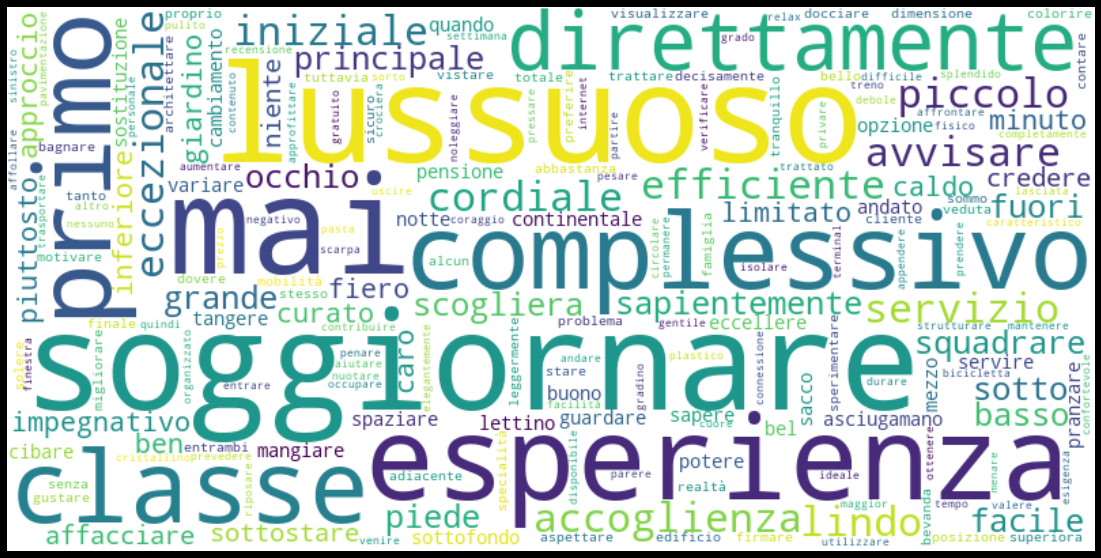

In [180]:
Word_Cloud(list(vectorizer.vocabulary_.items()))

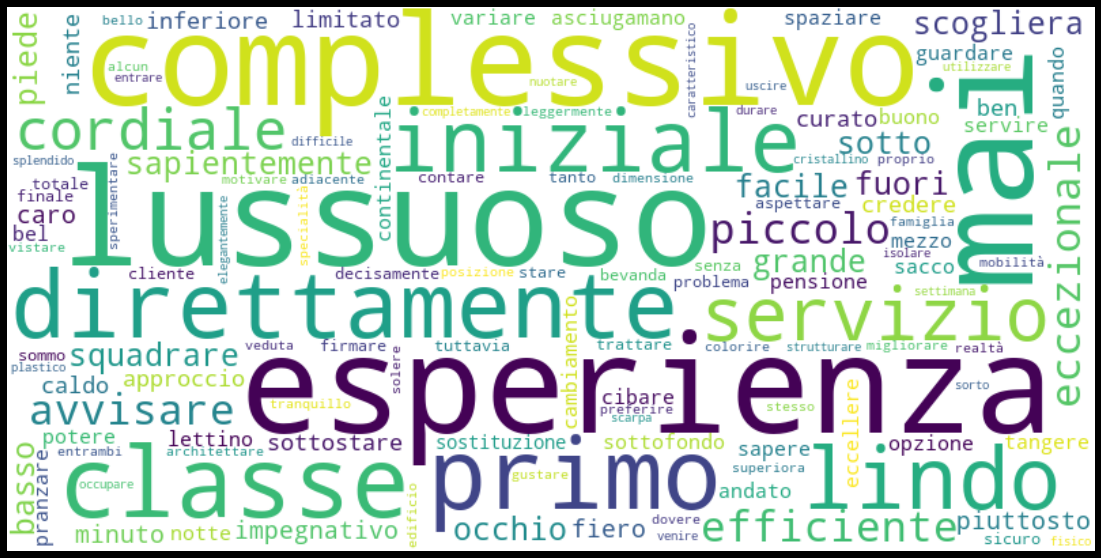

In [199]:
Word_Cloud(list(vectorizer.vocabulary_.items()))

In [149]:
list(vectorizer.vocabulary_.items())

[('molto', 6855),
 ('lussuoso', 6360),
 ('avere', 991),
 ('mai', 6405),
 ('soggiornare', 10813),
 ('esperienza', 3883),
 ('complessivo', 2568),
 ('primo', 9002),
 ('classe', 2429),
 ('direttamente', 3332),
 ('accoglienza', 96),
 ('iniziale', 5908),
 ('lindo', 6247),
 ('servizio', 10567),
 ('cordiale', 2865),
 ('efficiente', 3777),
 ('ristorare', 9922),
 ('terrazzare', 11840),
 ('avvisare', 1398),
 ('eccezionale', 3744),
 ('piccolo', 8282),
 ('visitare', 12615),
 ('parlare', 7801),
 ('sapientemente', 10160),
 ('gestire', 5366),
 ('sotto', 11022),
 ('occhio', 7416),
 ('grande', 5529),
 ('squadrare', 11197),
 ('trovare', 12121),
 ('cimare', 2378),
 ('scogliera', 10279),
 ('fuori', 5232),
 ('portare', 8475),
 ('principale', 9057),
 ('facile', 4826),
 ('raggiungere', 9546),
 ('piede', 8347),
 ('versare', 12499),
 ('basso', 1518),
 ('impegnativo', 5744),
 ('tornire', 11953),
 ('caro', 2087),
 ('fiero', 4995),
 ('fissare', 5042),
 ('minuto', 6779),
 ('macchinare', 6368),
 ('cercare', 2232),
 

In [185]:
stemmer=SnowballStemmer("italian")
a = stemmer.stem("viaggiato")

In [186]:
a

'viagg'